In [ ]:
import pandas as pd

In [ ]:
df_v=pd.read_csv('merged.csv')
df_v.head()

,Unnamed: 0,NPI,full_name,gndr,Cred,Med_sch,Grd_yr,pri_spec,adr,cty,st,zip_x,phn_numbr,hosp_afl_lbn_1
0,0,1215321872,Eve Masiello,F,NaN,Other,1982.0,Clinical Social Worker,120 Court St,Plymouth,MA,023603826,7.817107e+09,NaN
1,1,1215195664,Celestina N Duru,F,NaN,New York College Of Podiatric Medicine,2007.0,Podiatry,2000 Esters Rd Suite 104,Irving,TX,750619580,NaN,NaN
2,2,1215188925,Reza Keshavarzi,M,NaN,University Of Kentucky College Of Medicine,2005.0,General Surgery,7330 Sw 62Nd Pl Suite 210,South Miami,FL,331434825,NaN,NaN
3,3,1215138714,Anthony Pham,M,NaN,"University Of North Texas Hsc, College Of Oste...",2003.0,Physical Medicine And Rehabilitation,11799 Beechnut St Suite A,Houston,TX,770724116,NaN,NaN
4,4,1215127840,Marcia E Nelson Vancini,F,CNS,Other,2002.0,Certified Clinical Nurse Specialist (Cns),2 Brentwood Cir,Andover,MA,018105129,9.783359e+09,Lawrence General Hospital


# Constructing a Dataset to Help Plan a Clinical Trial

# About Me

Hi, I’m Marin Schiffman, and I am a Biomedical Engineering student at Vanderbilt University. As I dive deeper into my academic career, it has become increasingly apparent that data analysis and the organization of information will be crucial in understanding the biomedical research that I hope to take part in. Through this notebook, I hope to demonstrate the new skills I have learned in data engineering.

# Project Summary

Clinical trials require lots of planning and are often quite particular in participants and requirements. Creating and organizing a dataset to help minimize the difficulty in identifying the right candidates to participate and/or run the trials would be valuable from both a physician and patient standpoint. Thus, the goal of this project was to construct a dataset that could be used to identify which physicians and hospitals should participate in various clinical trials. Moreover, constructing such a dataset would provide a wealth of information to the dataset viewer all in one place, providing multiple options, and therefore increasing the likelihood of a successful clinical trial. In this project, I completed an exploratory data analysis, cleaned and formatted data, merged datasets from multiple sources, and found multiple ways to highlight and visualize key insights that the dataset provides. The final result of this project is a comprehensive overview of vast datasets containing useful information for various clinical trials, with graphics that detail key characteristics to improve understanding, impact, and ease of use from those looking to design clinical trials.

***Please feel free to check out the code behind this project at this link: https://deepnote.com/project/Session-1-Example-Notebooks-Duplicate-objELJrVTSKd_P1hczlUSw/%2FSession-1-Example-Notebooks-Duplicate%2FExamples%2FSession%201%2Fmerging_code.ipynb

Text(0.5, 1.0, 'Top States in the Dataset')

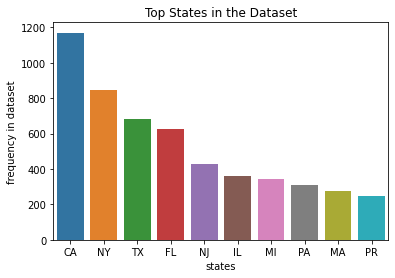

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
states = sns.countplot(x='st', data=df_v,order=df_v.st.value_counts()[:10].index)
states.set_xlabel('states')
states.set_ylabel('frequency in dataset')
states.set_title('Top States in the Dataset')

Male to Female Ratio of Dataset

Text(0.5, 1.0, 'Male to Female Ratio')

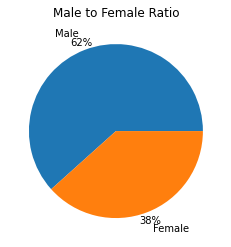

In [ ]:
gender_diff = df_v[' gndr']. value_counts() 
plt.pie(gender_diff,labels=['Male','Female'], autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.title('Male to Female Ratio')

Which primary specialties are most abundant in this dataset?

In [ ]:
top_specs = df_v.pivot_table(columns=['pri_spec'], aggfunc='size').nlargest(10)
df_top_specs = pd.DataFrame(top_specs)

Top Specialties

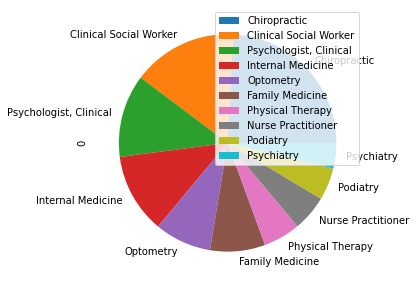

In [ ]:
plot = df_top_specs.plot.pie(subplots=True, figsize=(5, 5),)

Which medical schools did these healthcare providers attend?

In [ ]:
n = 10
df_v['Med_sch'].value_counts()[:n].index.tolist()
top_sch = df_v.pivot_table(columns=['Med_sch'], aggfunc='size').nlargest(11)
df_top_sch = pd.DataFrame(top_sch)
df_top_sch = df_top_sch.drop(index=('Other'))

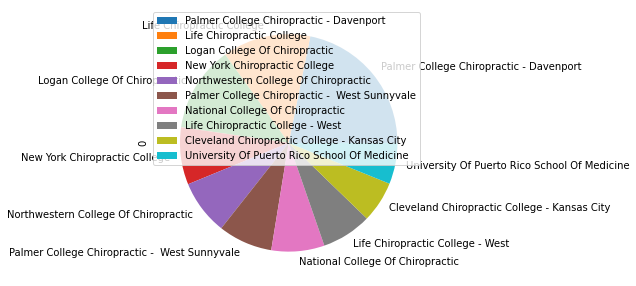

In [ ]:
plot = df_top_sch.plot.pie(subplots=True, figsize=(5, 5))

Text(0.5, 1.0, 'Overall Graduation Year Distribution')

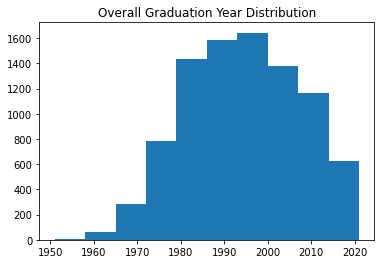

In [ ]:
#graduation year distribution for entire dataset
grd_hist = plt.hist(df_v['Grd_yr'])
plt.title('Overall Graduation Year Distribution')

# Interactive Query

Begin By Searching for Information by State:

In [ ]:
df_state = df_v[["st"]]
df_state.loc[df_state.st.duplicated(),:]
df_state = df_state.drop_duplicates(subset=None, keep='first', inplace=False)

In [ ]:
state = 'SC'

In [ ]:
contains_state = df_v[df_v['st'].str.contains(state)]
contains_state.head(n=10)

,Unnamed: 0,NPI,full_name,gndr,Cred,Med_sch,Grd_yr,pri_spec,adr,cty,st,zip_x,phn_numbr,hosp_afl_lbn_1
202,202,1215240759,Christopher Bedenbaugh,M,NaN,Sherman College Of Straight Chiropractic,2010.0,Chiropractic,1463 E Main St A,Spartanburg,SC,293072246,NaN,NaN
223,223,1215132733,Tasha M Williams,F,NaN,Clvlnd Clinic Lerner College Of Med Of Case Ws...,1999.0,Clinical Social Worker,3251 Landmark Dr Suite 142,North Charleston,SC,294188466,NaN,NaN
236,236,1215161153,Gavin Davis,M,NaN,Medical University Of South Carolina College O...,2009.0,Ophthalmology,4723 Sunset Blvd Suite A,Lexington,SC,290729151,NaN,NaN
276,276,1215300983,Taylor Huntley,M,NaN,Other,2015.0,Chiropractic,1451 W Palmetto St,Florence,SC,295014173,NaN,NaN
279,279,1215122890,Martia L Creighton Thigpen,F,NaN,Palmer College Chiropractic - Davenport,2005.0,Chiropractic,9016 Farrow Rd B,Columbia,SC,292038933,NaN,NaN
412,412,1205909009,Kevin M Mobley,M,NaN,Life Chiropractic College - West,2002.0,Chiropractic,1097 S Pendleton St,Easley,SC,296421050,NaN,NaN
494,494,1205939550,Treadwell Campbell,M,NaN,Meharry Medical College School Of Medicine,1985.0,Family Medicine,2835 E Hwy 76 Suite 6,Mullins,SC,295746038,NaN,Musc Health Marion Medical Center
571,571,1205995974,Michael J Hudak,M,NaN,Palmer College Chiropractic - Davenport,1995.0,Chiropractic,10799 Hwy 707 Suite 3,Murrells Inlet,SC,295769819,NaN,NaN
893,893,1205895398,Anthony L Morris,M,NaN,Life Chiropractic College,1989.0,Chiropractic,1750 Mr Joe White Ave,Myrtle Beach,SC,295775620,8.434486e+09,NaN
992,992,1215000468,William B Richardson,M,NaN,Other,2003.0,Interventional Pain Management,3520 Park Ave Blvd Suite 105,Mt Pleasant,SC,294667242,NaN,East Cooper Medical Center


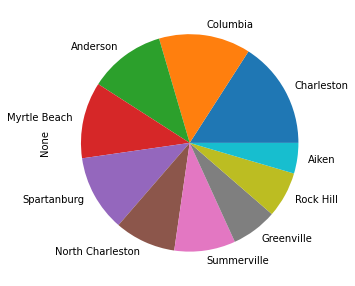

In [ ]:
cities = contains_state.pivot_table(columns=['cty'], aggfunc='size').nlargest(10)
plot_cities = cities.plot.pie(subplots=True, figsize=(5, 5))

In [ ]:
pop_specs = contains_state.pivot_table(columns=['pri_spec'], aggfunc='size').nlargest(10)
print('These are the specialties that are most abundant in {}:'.format(state))
print(pop_specs)

These are the specialties that are most abundant in CA:
pri_spec
Chiropractic              164
Psychologist, Clinical    150
Internal Medicine         109
Family Medicine            79
Optometry                  65
Clinical Social Worker     61
Podiatry                   43
Obstetrics/Gynecology      39
Physical Therapy           33
Neurology                  32
dtype: int64


These are the cities within your selected state with the most professionals in the dataset.

In [ ]:
#top cities, as shown in the pie chart previously#
list_cty = pd.DataFrame(contains_state.cty)
n = 10
list_cty = list_cty['cty'].value_counts()[:n].index.tolist()
list_cty

['Los Angeles',
 'San Diego',
 'San Francisco',
 'San Jose',
 'Sacramento',
 'Newport Beach',
 'Glendale',
 'Irvine',
 'Santa Rosa',
 'Bakersfield']

Choose a City to Find a Hospital

In [ ]:
city = 'Newport Beach'

In [ ]:
contains_cty = pd.DataFrame(df_v[df_v['cty'].str.contains(city)])
contains_cty

,Unnamed: 0,NPI,full_name,gndr,Cred,Med_sch,Grd_yr,pri_spec,adr,cty,st,zip_x,phn_numbr,hosp_afl_lbn_1
27,27,1215138391,Dale W Oneal,M,NaN,Other,1983.0,"Psychologist, Clinical",366 San Miguel Dr Suite 309,Newport Beach,CA,926607810,9.494977e+09,NaN
1505,1505,1205810611,Amy P Opfell,F,MD,Other,1984.0,Anesthesiology,3333 W Coast Hwy Suite 100,Newport Beach,CA,926634087,NaN,NaN
1713,1713,1205810066,Philip A Robinson,M,MD,University Of Michigan Medical School,1990.0,Infectious Disease,320 Superior Ave Suite 290,Newport Beach,CA,926636140,9.496509e+09,Hoag Memorial Hospital Presbyterian
2005,2005,1205134665,Sadia Khan,F,NaN,Other,2009.0,General Surgery,1 Hoag Dr,Newport Beach,CA,926634162,NaN,Hoag Memorial Hospital Presbyterian
2120,2120,1205026077,Christal Bernous,F,NaN,Other,1993.0,"Psychologist, Clinical",1451 Quail St Suite 102,Newport Beach,CA,926602747,7.143457e+09,NaN
2191,2191,1194955849,Hawaa E Ali,F,NaN,Southern California College Of Optometry,2009.0,Optometry,1000 Bristol St N Suite 29,Newport Beach,CA,926608917,NaN,NaN
2494,2494,1194947986,Jeffrey K Bone,M,CP,Other,2003.0,"Psychologist, Clinical",4060 Campus Dr Suite 130,Newport Beach,CA,926602205,9.493754e+09,NaN
2617,2617,1194782847,Emanuel Shaoulian,M,MD,Other,1978.0,Cardiovascular Disease (Cardiology),320 Superior Ave Suite 280,Newport Beach,CA,926636140,NaN,Hoag Memorial Hospital Presbyterian
3455,3455,1194110676,Yazan Abdullah,M,NaN,Other,2014.0,Internal Medicine,1501 Superior Ave Suite 208,Newport Beach,CA,926633640,NaN,NaN
3790,3790,1184949570,David T Ahn,M,NaN,"University Of California, San Diego School Of ...",2010.0,Endocrinology,520 Superior Ave Suite 150,Newport Beach,CA,926633642,9.497647e+09,Hoag Memorial Hospital Presbyterian


In [ ]:
hospitals = contains_cty.pivot_table(columns=['hosp_afl_lbn_1'], aggfunc='size').nlargest(10)
hospitals.empty == True
if hospitals.empty:
  print('There are no hospitals in this city in the dataset.')
if not hospitals.empty:
    print('Hospitals in {} and the number of professionals in dataset working there: '.format(city))
    print(hospitals)

Hospitals in Newport Beach and the number of professionals in dataset working there: 
hosp_afl_lbn_1
Hoag Memorial Hospital Presbyterian    10
dtype: int64


Please type the specialty you would like to search for below.

In [ ]:
df_specialties = contains_cty[["pri_spec"]]
df_specialties_in_state = df_specialties.drop_duplicates('pri_spec',inplace=False)

In [ ]:
selected_specialty = 'Infectious Disease'

In [ ]:
years_of_experience = 2

Text(0.5, 1.0, 'Graduation Year Distribution in Newport Beach')

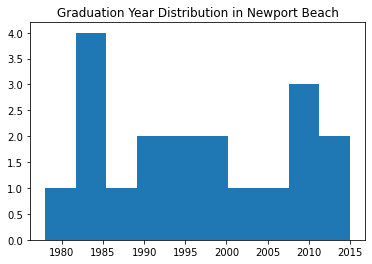

In [ ]:
#to compare, graduation year distribution in the city selected
grd_hist_spec = plt.hist(contains_cty['Grd_yr'])
plt.title('Graduation Year Distribution in {}'.format(city))

In [ ]:
contains_spec = contains_cty[contains_cty['pri_spec'].str.contains(selected_specialty)]
spec_st = contains_spec[contains_cty['st'].str.contains(state)]
df_spec_st = pd.DataFrame(contains_spec)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [ ]:
#finding the latest year of graduation possible to maintain minimum years of experience requested#
max_yr_grad = 2022 - years_of_experience
max_yr_grad

2020

In [ ]:
#table meeting the specialty, years of experience, and city from the previous inputs
qual_df= contains_spec.loc[df_spec_st['Grd_yr']<=max_yr_grad]
qual_df.head(n=10)

,Unnamed: 0,NPI,full_name,gndr,Cred,Med_sch,Grd_yr,pri_spec,adr,cty,st,zip_x,phn_numbr,hosp_afl_lbn_1
1713,1713,1205810066,Philip A Robinson,M,MD,University Of Michigan Medical School,1990.0,Infectious Disease,320 Superior Ave Suite 290,Newport Beach,CA,926636140,9.496509e+09,Hoag Memorial Hospital Presbyterian
6564,6564,1174588891,William M Thompson,M,MD,Other,2000.0,Infectious Disease,1501 Superior Ave Suite 205,Newport Beach,CA,926633640,9.492008e+09,Hoag Memorial Hospital Presbyterian


# Table Featuring Doctors Meeting Your Requests

In [ ]:
by_exp = qual_df.sort_values(by='Grd_yr',axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)
df_by_exp = pd.DataFrame(data=by_exp,columns=['full_name','Grd_yr'])

print('These are the profesionals with the most experience fitting {}, {}, and {} year experience minimum.'.format(state,selected_specialty,years_of_experience))
print(df_by_exp.head(n=10))

These are the profesionals with the most experience fitting CA, Infectious Disease, and 2 year experience minimum.
                full_name  Grd_yr
1713   Philip A Robinson   1990.0
6564  William M Thompson   2000.0


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a1b8c42c-9ad5-4d22-9dfc-fd617339544b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>